In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
path = "F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/6/data/cifar-10-batches-bin/"

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
A = np.fromfile(path + "data_batch_1.bin", dtype=np.uint8).reshape(10000, 3073)
# 0:airplane, 1:automobile, 2:bird, 3:cat, 4:deer, 5:dog, 6:frog, 7:horse, 8:ship, 9:truck
labels = A[:, 0].reshape(-1, 1).astype(np.float32)
images = A[:, 1:].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)

[9.]


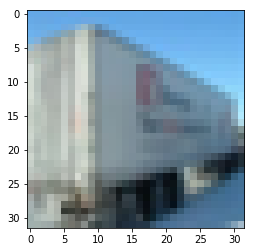

In [3]:
plt.imshow(images[15])
print(labels[15])  # 9 -> truck

In [4]:
images = images.astype(np.float32)
onc = OneHotEncoder(sparse=False)
labels = onc.fit_transform(labels).astype(np.float32)

In [5]:
def conv_model(X, y):
    X = tf.reshape(X, shape=[-1, 32, 32, 3])
    with tf.variable_scope("conv_layer1"):
        # [-1, 32, 32, 3] -> [-1, 32, 32, 16]
        h_conv1 = tf.contrib.layers.conv2d(X, 
                                           num_outputs=16, 
                                           kernel_size=[5, 5], 
                                           padding="SAME",
                                           activation_fn=tf.nn.relu)
        # [-1, 32, 32, 16] -> [-1, 16, 16, 16]
        h_pool1 = tf.nn.max_pool(value=h_conv1, 
                                 ksize=[1, 2, 2, 1], 
                                 strides=[1, 2, 2, 1], 
                                 padding="SAME")
    with tf.variable_scope("conv_layer2"):
        # [-1, 16, 16, 16] -> [-1, 16. 16, 16]
        h_conv2 = tf.contrib.layers.conv2d(h_pool1, 
                                           num_outputs=16, 
                                           kernel_size=[5, 5], 
                                           padding="SAME", 
                                           activation_fn=tf.nn.relu)
        # [-1, 16, 16, 16] -> [-1, 8, 8, 16]
        h_pool2 = tf.nn.max_pool(value=h_conv2, 
                                 ksize=[1, 2, 2, 1], 
                                 strides=[1, 2, 2, 1], 
                                 padding="SAME")
    h_pool2_flat = tf.reshape(h_pool2, [-1, 8 * 8 * 16])
    h_fc1 = tf.contrib.layers.stack(h_pool2_flat, 
                                    layer=tf.contrib.layers.fully_connected, 
                                    stack_args=[96, 48], 
                                    activation_fn=tf.nn.relu)
    pred, loss = skflow.models.logistic_regression(h_fc1, y)
    #loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred + 1e-10), axis=1), axis=0)
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    return pred, loss, train_op
            

In [6]:
model_dir = "C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap06_save/"

In [7]:
clf = skflow.Estimator(model_fn=conv_model, model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CF980F47B8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap06_save/'}


In [8]:
clf.fit(images[:1000], labels[:1000])

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Use `tf.losses.softmax_cross_entropy` and explicit logits computation.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap06_save/model.ckpt-0


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [48,10] rhs shape= [48,20]
	 [[Node: save/Assign_10 = Assign[T=DT_FLOAT, _class=["loc:@logistic_regression/weights"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](logistic_regression/weights, save/RestoreV2_10/_3)]]
	 [[Node: save/RestoreV2_6/_12 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_38_save/RestoreV2_6", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save/RestoreV2_6)]]

Caused by op 'save/Assign_10', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-50dffce20145>", line 1, in <module>
    clf.fit(images[:1000], labels[:1000])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 464, in fit
    SKCompat(self).fit(x, y, batch_size, steps, max_steps, monitors)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1439, in fit
    monitors=all_monitors)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 480, in fit
    loss = self._train_model(input_fn=input_fn, hooks=hooks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1036, in _train_model
    config=self._session_config
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 368, in MonitoredTrainingSession
    stop_grace_period_secs=stop_grace_period_secs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 673, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 493, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 851, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 856, in _create_session
    return self._sess_creator.create_session()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 554, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 419, in create_session
    self._scaffold.finalize()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 212, in finalize
    self._saver.build()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 745, in _build_internal
    restore_sequentially, reshape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 470, in _AddShardedRestoreOps
    name="restore_shard"))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 439, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 160, in restore
    self.op.get_shape().is_fully_defined())
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 56, in assign
    use_locking=use_locking, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [48,10] rhs shape= [48,20]
	 [[Node: save/Assign_10 = Assign[T=DT_FLOAT, _class=["loc:@logistic_regression/weights"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](logistic_regression/weights, save/RestoreV2_10/_3)]]
	 [[Node: save/RestoreV2_6/_12 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_38_save/RestoreV2_6", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save/RestoreV2_6)]]
